### Preprocessing Notebook for Stamping Dataset

Import standard Python libraries

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

- Due to computer resources I only focused on 100 snapshots of a single heat stamp 

- Originally each snapshot had temperature and zero values so I clean up the csv by removing zero rows and columns 

In [3]:
path = 'subset' # use your path
all_files = glob.glob(os.path.join(path, '*.csv'))

for filename in all_files:
    df = pd.read_csv(filename, sep = ';')
    df = df.drop('0.000', 1)
    df = df.loc[(df!=0).any(1), (df!=0).any(0)]
    df.to_csv(filename, header=False, index=False) 

##### The code blocks below are used to parse the Filename to get the date & time of the image

1. This is an example of parsing the date and time of just one file

In [4]:
#Use this Code to Parse the Filename to get the date & time of the image
#Example Parsing the Filename of one file
filename = "subset/Modified/Sc2_21_June_19_11_05_59.csv"
data = pd.read_csv(filename, header= None)
filename = filename[:-4]
arr = filename.split("_")
title = ("%s-%s-%s %s:%s:%s" %(arr[1], arr[2], arr[3], arr[4], arr[5], arr[6]))
title

'21-June-19 11:05:59'

- This is the code to parse the 100 images from Jun 21, 2019 11:05:59 -> Jun 21, 2019 12:27:01 
- The selection process was necessary as I needed a small subset of the entire dataset to perform analysis on as analyzing the entire thing would consume too much time
- These 100 snapshots will served as the dataset for our analysis

In [5]:
path = 'subset/Modified' # use your path
all_files = glob.glob(os.path.join(path, '*.csv'))
title = []
for filename in all_files:
    data = pd.read_csv(filename, header = None)
    filename = filename[:-4]
    arr = filename.split("_")
    _title = ("%s-%s-%s %s:%s:%s" %(arr[1], arr[2], arr[3], arr[4], arr[5], arr[6]))
    title.append(_title)


I attempted to create "better" heatmap of the dataset by using the seaborn library. 
I ended up only doing 4 because of how slow the process took

C:\Users\Jason Cheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


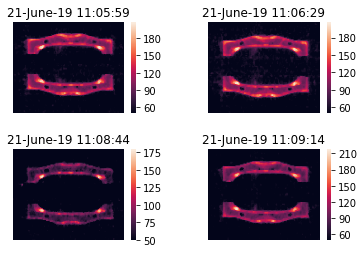

In [4]:
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
path = 'subset' # use your path
all_files = glob.glob(os.path.join(path, '*.csv'))
fig, ax = plt.subplots(nrows=2, ncols=2) #change for desire size
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, filename in enumerate(all_files, 1): ## will open an empty extra figure :(
    ax = plt.subplot(2,2,i) #change to desire size
    data = pd.read_csv(filename)
    filename = filename[:-4]
    arr = filename.split("_")
    title = ("%s-%s-%s %s:%s:%s" %(arr[1], arr[2], arr[3], arr[4], arr[5], arr[6]))
    
    heat_map=sb.heatmap(data,xticklabels=False, yticklabels= False)
    ax.set_title(title)
fig.show()

In [257]:
fig.savefig('Heatmap of 4.pdf') #Saved the Heatmap Data

I'm parsing the csv files for values greater than 50 in order to perform analysis later


Creation of DataFrame 

1. Setup Date/Time Column
2. Initialize Empty Column named "Dataset" to store each of the snapshots

In [54]:
'''Build a dataframe from the 100 snapshots '''
df = pd.DataFrame()

df.insert(0, "Time", title) 

df["Dataset"] = np.empty((len(df), 0)).tolist()

,Time,Dataset
0,21-June-19 11:05:59,[]
1,21-June-19 11:06:29,[]
2,21-June-19 11:08:44,[]
3,21-June-19 11:09:14,[]
4,21-June-19 11:09:44,[]
5,21-June-19 11:10:14,[]
6,21-June-19 11:10:44,[]
7,21-June-19 11:11:14,[]
8,21-June-19 11:11:44,[]
9,21-June-19 11:12:14,[]


In [55]:
df.loc[0, "Dataset"] = temp

,Time,Dataset
0,21-June-19 11:05:59,"[50.15, 50.3, 50.45, 50.6, 50.45, 50.3, 50.15,..."
1,21-June-19 11:06:29,[]
2,21-June-19 11:08:44,[]
3,21-June-19 11:09:14,[]
4,21-June-19 11:09:44,[]
5,21-June-19 11:10:14,[]
6,21-June-19 11:10:44,[]
7,21-June-19 11:11:14,[]
8,21-June-19 11:11:44,[]
9,21-June-19 11:12:14,[]


Creates a list for each snapshot (100 in total) of values greater than 50 for feature extraction later on

In [62]:
path = 'subset/Modified' # use your path
all_files = glob.glob(os.path.join(path, '*.csv'))
for idx, filename in enumerate(all_files):
    temp = []
    file = pd.read_csv(filename, header = None)
    for _, row in file.iterrows():
        for i in row:
            if i > 50:
                temp.append(i)
    temp = np.array(temp) 
    df.at[idx, "Dataset"] = temp

,Time,Dataset
0,21-June-19 11:05:59,"[50.15, 50.3, 50.45, 50.6, 50.45, 50.3, 50.15,..."
1,21-June-19 11:06:29,"[50.2, 50.4, 50.6, 50.8, 51.025, 51.25, 51.475..."
2,21-June-19 11:08:44,"[51.85, 53.7, 55.55, 57.4, 57.125, 56.85, 56.5..."
3,21-June-19 11:09:14,"[50.425, 50.85, 51.275, 51.7, 51.8, 51.9, 52.0..."
4,21-June-19 11:09:44,"[50.475, 50.95, 51.425, 51.9, 52.375, 52.85, 5..."
5,21-June-19 11:10:14,"[50.65, 50.975, 51.3, 51.15, 51.0, 50.85, 50.7..."
6,21-June-19 11:10:44,"[50.194, 50.38800000000001, 50.581, 50.775, 50..."
7,21-June-19 11:11:14,"[50.225, 50.45, 50.675, 50.9, 51.175, 51.45, 5..."
8,21-June-19 11:11:44,"[50.6, 51.2, 51.8, 52.4, 51.8, 51.2, 50.6, 50...."
9,21-June-19 11:12:14,"[50.225, 50.45, 50.675, 50.9, 50.675, 50.45, 5..."


Calculate the Effective Heatzone of the snapshot which are cells that have values of 50 or greater

In [64]:
#Not the Best Way to do it
s1 = []
for i in df['Dataset']:
    x = 0
    arr = np.ravel(i)
    for j in arr:
        if j > 50:
            x += 1
    s1.append(x)
df['Heat Zone'] = s1 

,Time,Dataset,Heat Zone
0,21-June-19 11:05:59,"[50.15, 50.3, 50.45, 50.6, 50.45, 50.3, 50.15,...",153427
1,21-June-19 11:06:29,"[50.2, 50.4, 50.6, 50.8, 51.025, 51.25, 51.475...",203807
2,21-June-19 11:08:44,"[51.85, 53.7, 55.55, 57.4, 57.125, 56.85, 56.5...",94795
3,21-June-19 11:09:14,"[50.425, 50.85, 51.275, 51.7, 51.8, 51.9, 52.0...",121499
4,21-June-19 11:09:44,"[50.475, 50.95, 51.425, 51.9, 52.375, 52.85, 5...",128739
5,21-June-19 11:10:14,"[50.65, 50.975, 51.3, 51.15, 51.0, 50.85, 50.7...",127510
6,21-June-19 11:10:44,"[50.194, 50.38800000000001, 50.581, 50.775, 50...",118960
7,21-June-19 11:11:14,"[50.225, 50.45, 50.675, 50.9, 51.175, 51.45, 5...",130505
8,21-June-19 11:11:44,"[50.6, 51.2, 51.8, 52.4, 51.8, 51.2, 50.6, 50....",148804
9,21-June-19 11:12:14,"[50.225, 50.45, 50.675, 50.9, 50.675, 50.45, 5...",163343


Code to get the Max Cell Temperature within the snapshot

In [65]:
res = []
for i in df['Dataset']:
    arr = np.array(i)
    res.append(arr.max())
df['Max Temperature'] = res


Code to get the Average Temp in the Snapshot

In [66]:
res = []
for i in df['Dataset']:
    arr = np.ravel(i)
    temp = []
    for i in arr:
        temp.append(i)
    res.append(sum(temp)/len(temp))
df['Average Temperature'] = res



,Time,Dataset,Heat Zone,Max Temperature,Average Temperature
0,21-June-19 11:05:59,"[50.15, 50.3, 50.45, 50.6, 50.45, 50.3, 50.15,...",153427,207.5,81.657962
1,21-June-19 11:06:29,"[50.2, 50.4, 50.6, 50.8, 51.025, 51.25, 51.475...",203807,206.1,76.343216
2,21-June-19 11:08:44,"[51.85, 53.7, 55.55, 57.4, 57.125, 56.85, 56.5...",94795,179.4,73.001514
3,21-June-19 11:09:14,"[50.425, 50.85, 51.275, 51.7, 51.8, 51.9, 52.0...",121499,217.9,84.590920
4,21-June-19 11:09:44,"[50.475, 50.95, 51.425, 51.9, 52.375, 52.85, 5...",128739,193.3,84.295585
5,21-June-19 11:10:14,"[50.65, 50.975, 51.3, 51.15, 51.0, 50.85, 50.7...",127510,196.1,85.233006
6,21-June-19 11:10:44,"[50.194, 50.38800000000001, 50.581, 50.775, 50...",118960,206.3,89.148370
7,21-June-19 11:11:14,"[50.225, 50.45, 50.675, 50.9, 51.175, 51.45, 5...",130505,202.6,85.139680
8,21-June-19 11:11:44,"[50.6, 51.2, 51.8, 52.4, 51.8, 51.2, 50.6, 50....",148804,200.4,81.733286
9,21-June-19 11:12:14,"[50.225, 50.45, 50.675, 50.9, 50.675, 50.45, 5...",163343,206.1,80.322736


Sort the heatmap inorder to get top 100 temperature

In [67]:
#In order to get certain features like "top 10..." I thought it was best to sort them
res = []
for i in df['Dataset']:
    arr = np.ravel(i)
    res.append(np.sort(arr))
df['Sorted Heatmap'] = res


[array([ 50.006,  50.006,  50.006, ..., 207.5  , 207.5  , 207.5  ]),
 array([ 50.006,  50.006,  50.006, ..., 206.1  , 206.1  , 206.1  ]),
 array([ 50.006,  50.006,  50.006, ..., 179.15 , 179.275, 179.4  ]),
 array([ 50.006,  50.006,  50.006, ..., 217.625, 217.75 , 217.9  ]),
 array([ 50.006,  50.006,  50.006, ..., 193.075, 193.3  , 193.3  ]),
 array([ 50.006,  50.006,  50.006, ..., 195.925, 195.925, 196.1  ]),
 array([ 50.006,  50.006,  50.006, ..., 206.025, 206.2  , 206.3  ]),
 array([ 50.006,  50.006,  50.006, ..., 202.6  , 202.6  , 202.6  ]),
 array([ 50.006,  50.006,  50.006, ..., 199.35 , 199.65 , 200.4  ]),
 array([ 50.006,  50.006,  50.006, ..., 206.1  , 206.1  , 206.1  ]),
 array([ 50.006,  50.006,  50.006, ..., 206.4  , 206.4  , 206.4  ]),
 array([ 50.006,  50.006,  50.006, ..., 218.2  , 218.2  , 218.2  ]),
 array([ 50.006,  50.006,  50.006, ..., 175.8  , 176.625, 178.   ]),
 array([ 50.006,  50.006,  50.006, ..., 194.3  , 194.75 , 195.3  ]),
 array([ 50.006,  50.006,  50.006,

Using the sorted arrays now average the top 100 values

In [68]:
#Code to get the Average Top Temperature within the snapshot
res = []
for i in df['Sorted Heatmap']:
    arr = i[-100:]
    res.append(arr.mean())
df['Average of Top 100 Temperature'] = res


[203.44964,
 203.79697999999996,
 176.38070000000008,
 214.24489999999997,
 191.43584999999996,
 193.25761,
 203.96461000000002,
 200.7189199999999,
 197.22407000000004,
 204.65025999999995,
 204.83337000000006,
 214.43988000000004,
 171.04093999999998,
 190.60125,
 198.52527,
 190.95461,
 201.46591999999998,
 198.12912,
 198.09395,
 204.39224,
 203.854,
 215.18077000000002,
 189.00418000000002,
 199.28188999999998,
 191.97511000000003,
 202.45257999999998,
 198.29752,
 203.76747999999992,
 209.39902999999995,
 215.17940000000002,
 223.01058,
 163.99102999999997,
 193.52657,
 202.48712999999995,
 197.98164999999995,
 200.76500000000007,
 215.83646000000002,
 217.67004,
 205.03282000000002,
 209.27938000000003,
 219.85701000000006,
 194.81385999999995,
 200.03412000000003,
 214.78037,
 173.10356999999996,
 200.52833000000007,
 200.46954000000005,
 199.94548000000006,
 200.28504,
 223.58204999999998,
 204.44817999999995,
 205.6259,
 210.69104000000007,
 206.15968,
 168.22137999999998,
 2

*Optional* but I wanted a column with only the hourly time to plot on the x-axis when we plot

In [69]:
_Time = []
for i in df['Time']: # will open an empty extra figure :(
    arr = i.split(":")
    temp = arr[0]
    arr[0] = temp[-2:]
    title = ("%s:%s:%s" %(arr[0], arr[1], arr[2]))
    _Time.append(title)
_Time
df['Hourly Time'] = _Time

Now we are done with our initial Preprocessing later on we can add more features but this will do for now

In [71]:
df.to_csv("Preprocessing M1.csv")#Save the dataframe as csv for future reference

**Data Visualization**

4 plots  
>  Plot: Heatzone, Max Temperature, Average Temperature, Average of Top 100 Temperature

C:\Users\Jason Cheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


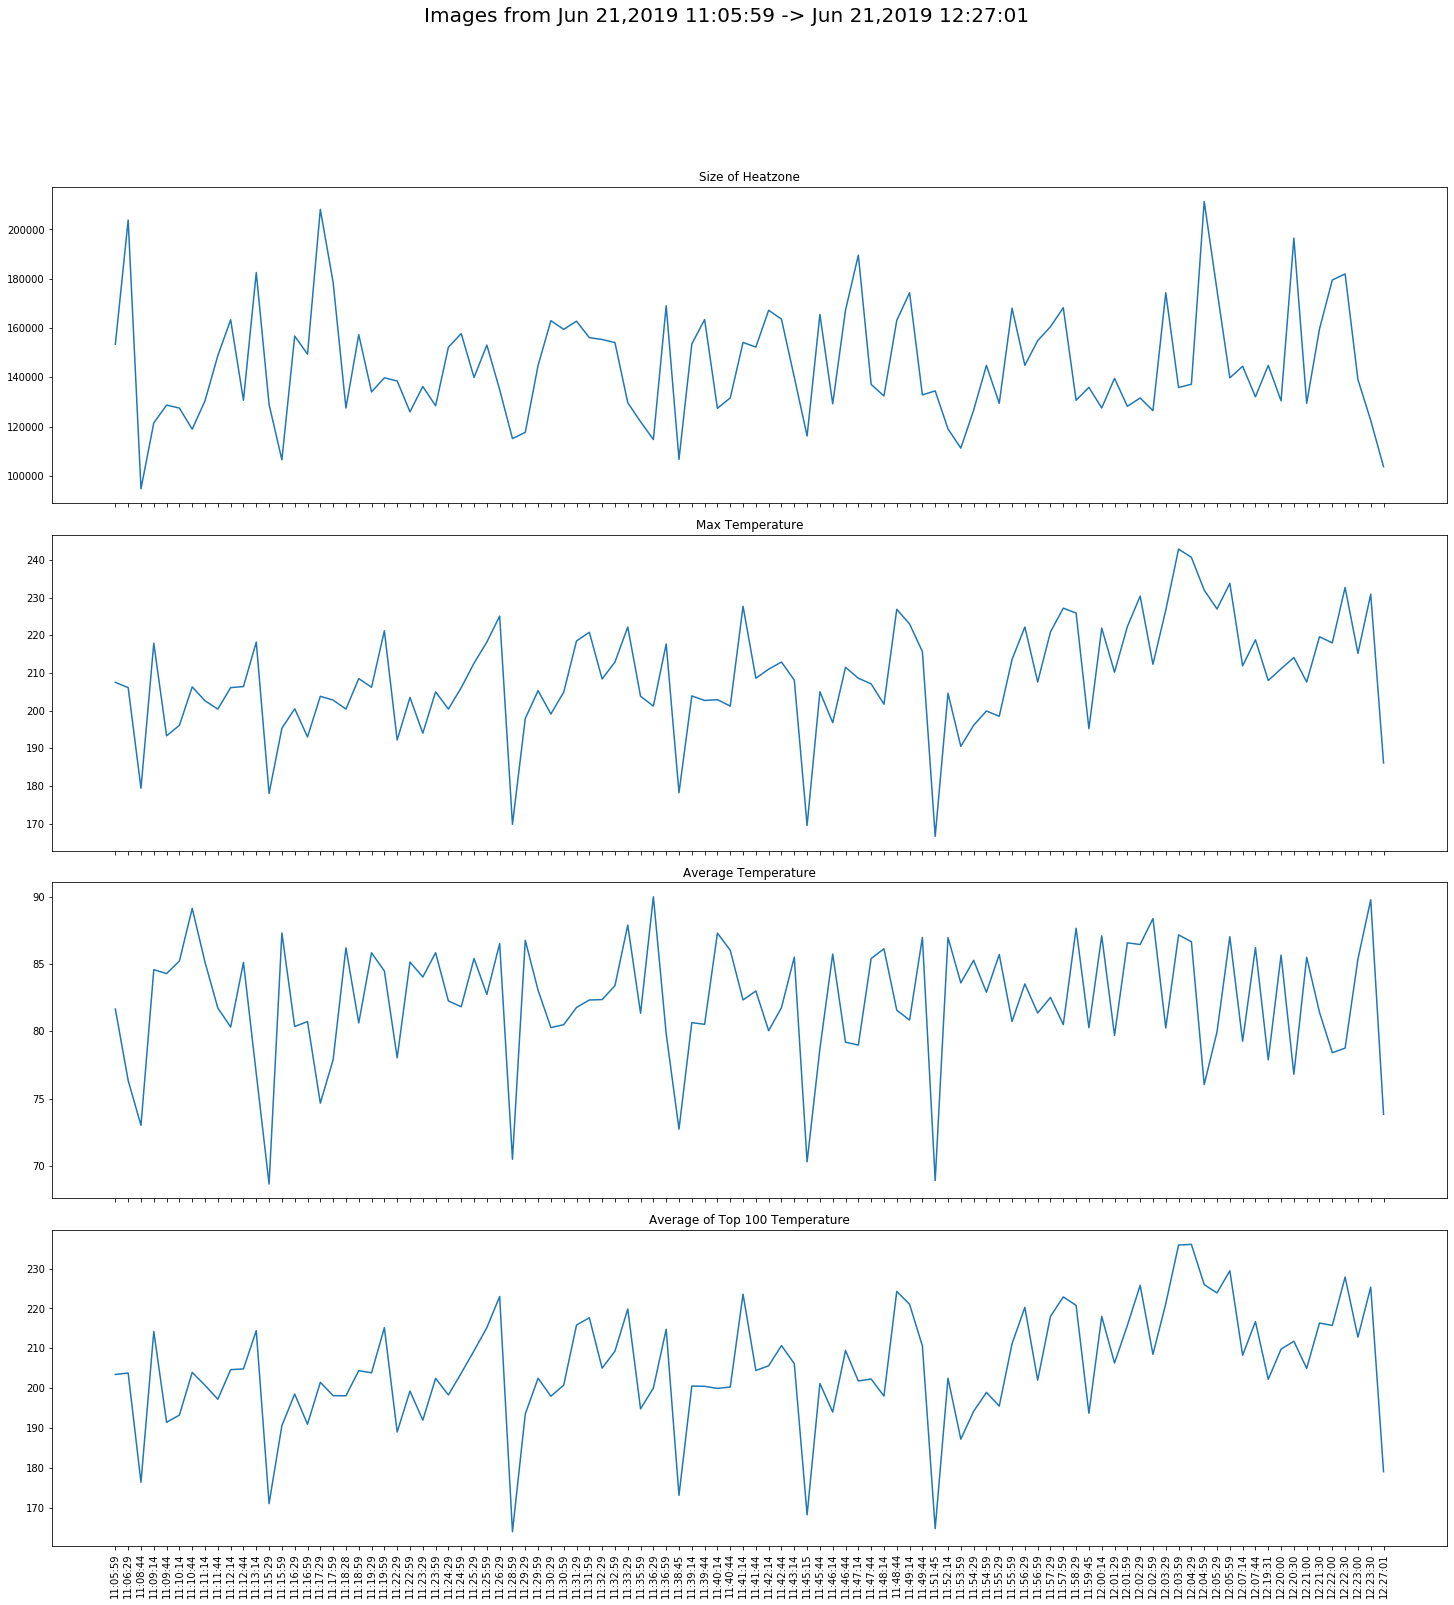

In [72]:
#Matplotlib Code for the graphs 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex = True, figsize = (25,25)) #change for desire size 
fig.subplots_adjust(hspace=0.1)
fig.suptitle('Images from Jun 21,2019 11:05:59 -> Jun 21,2019 12:27:01', fontsize = 20)
#ax1 = plt.subplot(4,1,1)
ax1.plot(df['Hourly Time'],df['Heat Zone'])
#ax1.xticks(range(len(df['Time'])), df['Time'])
ax1.set_title('Size of Heatzone')


#ax2 = plt.subplot(4,1,2)
ax2.plot(df['Max Temperature'])
ax2.set_title('Max Temperature')

#ax3 = plt.subplot(413)
ax3.plot(df['Average Temperature'])
ax3.set_title('Average Temperature')

#ax4 = plt.subplot(414)
ax4.plot(df['Average of Top 100 Temperature'])
ax4.set_title('Average of Top 100 Temperature')

plt.xticks(rotation=90)
fig.show()
#fig.xticks(range(len(df['Hourly Time'])), df['Hourly Time'])
    

Save our Plot

In [73]:
fig.savefig('Plots.pdf')

In [74]:
"""Edit 1/10/20 Wanted to Clean up the dataframe"""
import pandas as pd

filename = "Preprocessing M1.csv"
df = pd.read_csv(filename, index_col="Time")
del df["Unnamed: 0"]
df.head()

,Dataset,Heat Zone,Max Temperature,Average Temperature,Sorted Heatmap,Average of Top 100 Temperature,Hourly Time
Time,,,,,,,
21-June-19 11:05:59,[50.15 50.3 50.45 ... 50.225 50.15 50.075],153427,207.5,81.657962,[ 50.006 50.006 50.006 ... 207.5 207.5 2...,203.44964,11:05:59
21-June-19 11:06:29,[50.2 50.4 50.6 ... 50.15 50.1 50.05],203807,206.1,76.343216,[ 50.006 50.006 50.006 ... 206.1 206.1 2...,203.79698,11:06:29
21-June-19 11:08:44,[51.85 53.7 55.55 ... 50.338 50.225 50.112],94795,179.4,73.001514,[ 50.006 50.006 50.006 ... 179.15 179.275 1...,176.38070,11:08:44
21-June-19 11:09:14,[50.425 50.85 51.275 ... 51.838 51.225 50.612],121499,217.9,84.590920,[ 50.006 50.006 50.006 ... 217.625 217.75 2...,214.24490,11:09:14
21-June-19 11:09:44,[50.475 50.95 51.425 ... 50.075 50.05 50.025],128739,193.3,84.295585,[ 50.006 50.006 50.006 ... 193.075 193.3 1...,191.43585,11:09:44


In [77]:
df.dtypes

Dataset                            object
Heat Zone                           int64
Max Temperature                   float64
Average Temperature               float64
Sorted Heatmap                     object
Average of Top 100 Temperature    float64
Hourly Time                        object
dtype: object

### This concludes the preprocessing Notebook

Looking forward, I want to add more features to the dataframe such as features that will take into the shape of the heatmap and the edges. Currently we are not taking into account the physical structure which could play be a possible path to examine.